# Make adjective-noun phrases

Now that we have a cleaned list of concrete and abstract words, we can work on constructing phrases. 

In [1]:
import os
import random

import re
import requests

import numpy as np
import pandas as pd

from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

## Adjectives

We are interested in studying whether the conceptual semantic system is sensitive to one kind of fine-grained distinction studied in linguistic semantics, called denotational semantics. Denotational semantics are driven by subsective adjectives (e.g., good, typical) and non-subsective adjectives (e.g., fake, former). The contrast in denotation arises only when the adjective composes with a noun. For example, a "typical diamond" is a diamond, while a "fake diamond" is not a diamond.

We start with non-subsective adjectives because they are more sparsely distributed in natural language. [Nayak and colleagues (2014)](https://www.cis.upenn.edu/~ccb/publications/non-subsective-adjectives.pdf) compiled a list of non-subsective adjectives. We focused on the privative kind, which has a list of 24 adjectives. We then removed adjectives for which we don't have readily available frequency measures (e.g., anti-, ex-, pseudosimulated, adjectives we think are archaic (e.g., erstwhile), and adjectives we think doesn't go well with our nouns (e.g., onetime, deputy). This results in the following 16 privative, non-subsective, adjectives.

In [2]:
adjectives_privative = ['artificial','counterfeit','fabricated','fake','false','fictional','fictitious','former',
                        'hypothetical','imaginary','mock','mythical','past','phony','spurious','virtual'] 

Subsective adjectives are much easier to find. We started with a list of adjectives (n=300) compiled by Lalisse and Asudeh (2015). We then used their classification of subsectives to narrow down to the same number of non-subsective adjectives we obtained above (n=16) that we think would go well with a wide array of concrete and abstract nouns. 

In [3]:
adjectives_subsective = ['actual','authentic','average','bad','current','genuine','good','important',
                         'new','old','perfect','real','special','true','typical','unique']

As single word baselines, we follow Bemis and Pylkkanen (2011) in using unpronounceable consonant strings as 'adjectives', the rationale being that these serves to engage the visual system from bottom-up to roughly the same extent as when it encounters actual adjectives.

In [4]:
consonant_strings = ['xkq', 'qxsw', 'mtpv', 'rjdnw', 'wvcnz', 'zbxlv','tqvgqrz', 'bxfjwts','mghljkqr',
                     'kmlsdjtw','ptrgsbkv','zrtqgfplh','vpbyzkgrf','htbqzylm','ypdcglkc','fxldmr','rvqf']

baselines = pd.DataFrame(consonant_strings, columns=['adjective'])
baselines['length'] = baselines['adjective'].str.len()
baselines.reset_index(drop=True, inplace=True)
print('Mean length: ', baselines.length.mean())
print('Std length: ', baselines.length.std())

Mean length:  6.352941176470588
Std length:  1.9666334327534274


Implement Excel's VLOOKUP function to get a bunch of psycholinguistic properties of these adjectives:
- Zipf frequency measures from SUBTLEX-UK
- semantic diversity from Hoffman et al. (2012)
- age of acquisition ratings from Kuperman et al. (2012)
- concreteness ratings from Brysbaert et al. (2014)

In [5]:
# adjectives = pd.DataFrame(data={'word':adjectives_subsective+adjectives_privative,'denotation':['subsective']*len(adjectives_subsective)+['privative']*len(adjectives_privative)})

# resources = [('zipf','../resources/subtlex_uk.csv','LogFreq(Zipf)'),
#              ('CNC_M','../resources/brysbaert_etal_2014.csv','Conc_M'),
#              ('CNC_SD','../resources/brysbaert_etal_2014.csv','Conc_SD'),
#              ('imageability','../resources/scott_etal_2019.csv','IMAG'),
#              ('valence','../resources/scott_etal_2019.csv','VAL'),
#              ('AoA','../resources/kuperman_etal_2012.csv','Rating.Mean'),
#              ('RT','../resources/blp-items.xls','rt')]

# def get_stimulus_property(resource='', dataframe=None):
#     stim_property = resource[0]
#     resource_fname = resource[1]
#     col_name = resource[2]
#     if stim_property == 'RT':
#         resource_df = pd.read_excel(resource_fname, index_col=0)
#     else:
#         resource_df = pd.read_csv(resource_fname, index_col=0)
#     dataframe = dataframe.merge(resource_df[col_name].rename(stim_property), left_on='word2', right_index=True, how='left')
#     dataframe = dataframe.astype({stim_property:'float'})
#     return dataframe

# # count word length in number of letters
# stimuli['length'] = stimuli['word2'].str.len()

# for resource in resources:
#     stimuli = get_stimulus_property(resource=resource, dataframe=stimuli)

# stimuli

# # read in SUBTLEX UK data
# subtlex = pd.read_csv(os.path.join(dir, 'resources', 'SUBTLEX-UK.csv'))
# subtlex.rename(columns={'Spelling': 'word', 'LogFreq(Zipf)':'Zipf_frequency'}, inplace=True)
# subtlex.set_index('word', inplace=True)
# subtlex = subtlex[subtlex.index.notnull()]

# # get zipf frequency for each adjective
# adjectives['zipf_frequency'] = ''
# adjectives.set_index('word', inplace=True)
# adjectives['zipf_frequency'] = adjectives.index.map(subtlex['Zipf_frequency'])
# adjectives.reset_index(inplace=True)

# # read in semantic diversity data
# semd = pd.read_csv(os.path.join(dir, 'resources', 'semantic_diversity_Hoffman_etal2012.csv'))
# semd.set_index('item', inplace=True)
# semd = semd[semd.index.notnull()]

# # get semantic diversity for each adjective
# adjectives['sem_d'] = ''
# adjectives.set_index('word', inplace=True)
# adjectives['sem_d'] = adjectives.index.map(semd['SemD'])
# adjectives.reset_index(inplace=True)

# # read in age of acquisition data
# AoA = pd.read_csv(os.path.join(dir, 'resources', 'AoA_ratings_Kuperman_et_al_BRM.csv'))
# AoA.set_index('Word', inplace=True)
# AoA = AoA[AoA.index.notnull()]

# # get semantic diversity for each adjective
# adjectives['AoA'] = ''
# adjectives.set_index('word', inplace=True)
# adjectives['AoA'] = adjectives.index.map(AoA['Rating.Mean'])
# adjectives.reset_index(inplace=True)

# # read in age of acquisition data
# concreteness = pd.read_csv(os.path.join(dir, 'resources', 'brysbaert_etal_2014.csv'))
# concreteness.set_index('Word', inplace=True)
# concreteness = concreteness[concreteness.index.notnull()]

# # get semantic diversity for each adjective
# adjectives['concreteness'] = ''
# adjectives.set_index('word', inplace=True)
# adjectives['concreteness'] = adjectives.index.map(concreteness['Conc_M'])
# adjectives.reset_index(inplace=True)

# # count word length in number of letters
# adjectives['length'] = adjectives['word'].str.len()
# adjectives

In [6]:
# print('Adjective concreteness mean')
# print(adjectives[['concreteness','length','denotation']].groupby('denotation').mean())
# print()
# print('Adjective concreteness standard deviation')
# print(adjectives[['concreteness','length','denotation']].groupby('denotation').std())

### Visualising psycholinguistic properties of these adjectives

In [7]:
# f, ax = plt.subplots(3, 2, figsize=(15,15))
# sns.set_context(font_scale=2)
# sns.histplot(x='zipf_frequency', hue='denotation', data=adjectives, ax=ax[0,0], element='step')
# sns.histplot(x='AoA', hue='denotation', data=adjectives, ax=ax[1,0], element='step')
# sns.histplot(x='concreteness', hue='denotation', data=adjectives, ax=ax[1,1], element='step')
# sns.histplot(x='length', hue='denotation', data=adjectives, ax=ax[2,0], element='step')
# sns.histplot(x='sem_d', hue='denotation', data=adjectives, ax=ax[2,1], element='step')
# f.suptitle('Psycholinguistic properties of {} adjectives'.format(int(len(adjectives))), fontsize=16)

# Phrases

For each condition (subsective, privative, single-word baseline), we take the list of relevant adjectives and repeat them. Specifically, we aim to repeat the nouns such that each adjective combines with the nouns with roughly the same frequency. We then shuffled the order of adjectives. 

Prepare adjective lists: repeating the adjectives into a list, shuffling the lists

In [8]:
# read in our cleaned list of nouns 
nouns = pd.read_csv(os.path.join(dir, 'concreteness_denotation/2_nouns_cleaned.csv'))

# create an array of adjectives to be concatenated with the noun dataframe
array_adjectives = np.empty((3, len(nouns)), dtype='object') # initialise array
for i, adjectives in enumerate([adjectives_subsective,adjectives_privative,consonant_strings]):
    adjectives_repeated = (adjectives * 19)[:len(nouns)]
    adjectives_repeated_shuffled = random.Random(42).sample(adjectives_repeated, len(adjectives_repeated)) # create random.Random instance for reproducibility
    array_adjectives[i] = adjectives_repeated_shuffled
    
# transpose and flatten to put into big df later
adjectives_all = np.transpose(array_adjectives).flatten()

Prepare the noun dataframe: repeat each noun 3 times, because there are 3 'adjective' conditions.

In [9]:
# repeat critical nouns 3 times for 3 denotation conditions
stimuli = pd.DataFrame(np.repeat(nouns.values, 3, axis=0)) 
stimuli.columns = nouns.columns # assign column names 
stimuli['denotation'] = ['subsective','privative','baseline'] * len(nouns) # add denotation condition

Put nouns and adjectives into one big dataframe

In [10]:
stimuli['adjective'] = adjectives_all
stimuli['phrase'] = stimuli.adjective + ' ' + stimuli.noun
stimuli

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG,denotation,adjective,phrase
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,subsective,old,old sulphur
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,privative,imaginary,imaginary sulphur
2,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.25,1.25,4.727,baseline,tqvgqrz,tqvgqrz sulphur
3,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,subsective,special,special longing
4,longing,1,abstract,3.408385,7,2,5,8,2.14,4.303,679.666667,1.13,3.235,privative,past,past longing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,syringe,137,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,privative,fictional,fictional syringe
818,syringe,137,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.4,baseline,zbxlv,zbxlv syringe
819,wrath,137,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,subsective,old,old wrath
820,wrath,137,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875,privative,imaginary,imaginary wrath


# Calculate phrasal statistics

In [12]:
# parameters for Google Books Ngram
corpus = 'eng-GB-2019' # British English
startYear, endYear = 1919, 2019 # most recent 100 years available on Google Books Ngram
smoothing = 3 # for extrapolating in case there's missing; this is default setting 
caseInsensitive = True 

print(f'Calculating bigram frequency...')
frequencies_dep = [] # dependency frequency
frequencies_seq = [] # sequence frequency
frequencies_all = [frequencies_dep, frequencies_seq] # for looping
for index, row in stimuli.iterrows():
    query_w2w1 = row.noun + '_NOUN' + '=>' + row.adjective + '_ADJ' # dependency frequency
    query_w1w2 = row.adjective + '_ADJ' + ' ' + row.noun + '_NOUN' # sequence frequency
    queries = [query_w2w1, query_w1w2] # for looping

    for query, frequencies in zip(queries, frequencies_all):
        params = dict(content=query, year_start=startYear, year_end=endYear,
                      corpus=corpus, smoothing=smoothing,
                      case_insensitive=caseInsensitive)
        req = requests.get('http://books.google.com/ngrams/graph', params=params)
        res = re.findall('"timeseries": \[(.*?)\]}', req.text) # find timeseries associated with each query
        if res: 
            timeseries = list(map(float, res[0].split(','))) 
            average_frequency = sum(timeseries) / len(timeseries) # calculate mean frequency across time
            frequencies.append(average_frequency)
        else: 
            frequencies.append(0)
#     print(str(index+1) + ' out of ' + str(len(phrases)) + ' done.')
stimuli['frequency_dep'] = frequencies_dep
stimuli['frequency_seq'] = frequencies_seq
# phrases.to_csv(os.path.join(f'phrases_bigramFreq_{date.today()}.csv'), index=False)

# calculate log frequencies 
stimuli['frequency_dep_log'] = np.log10(stimuli['frequency_dep'])
stimuli['frequency_seq_log'] = np.log10(stimuli['frequency_seq'])
print('Done.')

Calculating bigram frequency...


NameError: name 'phrases' is not defined

Save this list of phrases to disk for to make comprehension questions.

In [51]:
stimuli.to_excel(f'3_phrases_{date.today()}.xlsx')

# Visualise distribution of psycholinguistic features

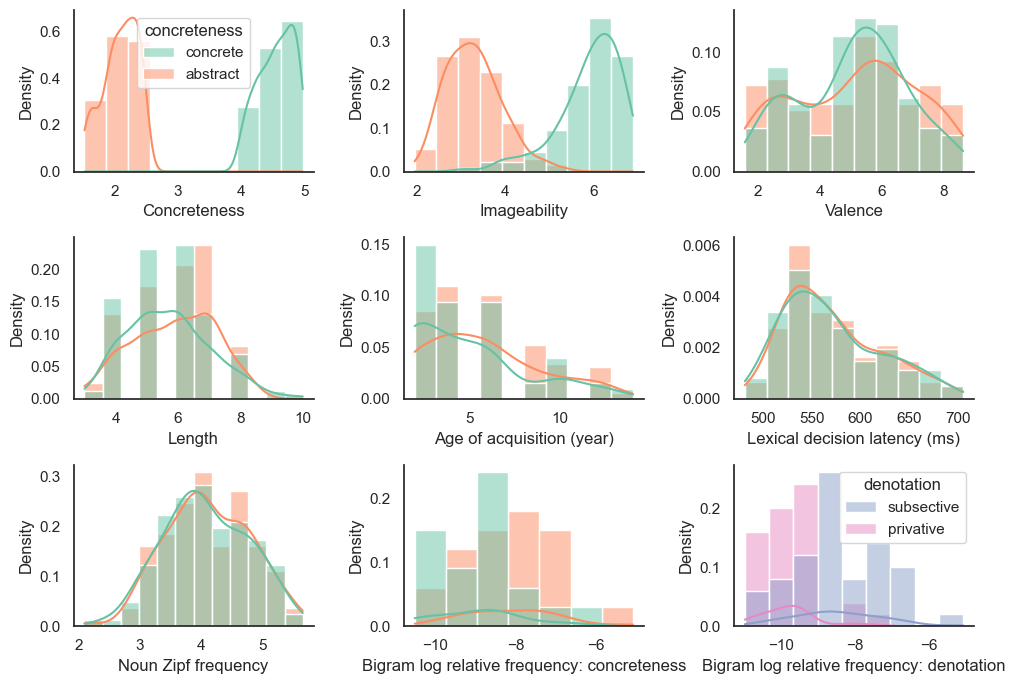

In [53]:
data_concreteness = stimuli.iloc[0::3] # select every 3 rows to get noun features
data_denotation = stimuli.query('denotation == "subsective" | denotation == "privative"')

fig, axes = plt.subplots(3, 3, figsize=(10,7))
sns.set_context(font_scale=1)
sns.set_theme(style='white', palette='Set2')

sns.histplot(x='CNC_M', hue='concreteness', data=data_concreteness, ax=axes[0,0], stat='density', kde=True).set_xlabel('Concreteness')
sns.histplot(x='IMAG', hue='concreteness', data=data_concreteness, ax=axes[0,1], stat='density', kde=True).set_xlabel('Imageability')
sns.histplot(x='Valence', hue='concreteness', data=data_concreteness, ax=axes[0,2], stat='density', kde=True).set_xlabel('Valence')

sns.histplot(x='Length', hue='concreteness', data=data_concreteness, ax=axes[1,0], stat='density', kde=True)
sns.histplot(x='AoA', hue='concreteness', data=data_concreteness, ax=axes[1,1], stat='density', kde=True).set_xlabel('Age of acquisition (year)')
sns.histplot(x='RT', hue='concreteness', data=data_concreteness, ax=axes[1,2], stat='density', kde=True).set_xlabel('Lexical decision latency (ms)')

sns.histplot(x='Zipf', hue='concreteness', data=data_concreteness, ax=axes[2,0], stat='density', kde=True).set_xlabel('Noun Zipf frequency')
sns.histplot(x='frequency_seq_log', hue='concreteness', data=data_concreteness, ax=axes[2,1], stat='density', kde=True).set_xlabel('Bigram log relative frequency: concreteness')
sns.histplot(x='frequency_seq_log', hue='denotation', data=data_denotation, ax=axes[2,2], stat='density', kde=True, palette=['C2','C3']).set_xlabel('Bigram log relative frequency: denotation')

# f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)
fig.tight_layout()
sns.despine()

# sns.move_legend(axes[0,0], "upper left", bbox_to_anchor=(.55, .45), frameon=False)
for ax in axes.ravel()[1:-1]:
    ax.legend([],[], frameon=False)


# for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
#     ax.legend(labelcolor='linecolor')

# for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
#     ax.text(0.03, ax.get_position().ymax, label, transform=fig.transFigure,
#             fontsize=15, fontweight='bold', va='top', ha='left')